Rerun your neural network on the newly projected Data

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import os
import pandas as pd
titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']

def get_data():

    #TODO: Update here
    os.chdir(r"D:\\gatech\\cs7641\\supervised_learning")
    titanic = pd.read_csv("titanic.csv", header = None)
    #Adding the column names
    titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']
    titanic.columns = titanic_col_names

    X = titanic.drop(['Survived'], axis=1)
    X = titanic.drop(['Name'], axis=1)
    # X2.dropna()

    y = titanic['Survived']

    X = pd.get_dummies(X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId']])  

    scaler = StandardScaler()

    X = scaler.fit_transform(X)

    ros = RandomOverSampler(random_state=0)
    X, y = ros.fit_resample(X, y)

    return X, y;

def run_neural_network(X_train, y_train, X_test, y_test):
    final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
    nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)
    nn_titanic_classifier.fit(X_train, y_train)
    nn_titanic_predictions = nn_titanic_classifier.predict(X_test)


    cm = confusion_matrix(y_test, nn_titanic_predictions)

    print('Confusion matrix\n\n', cm)

    print('Class Report')
    print(classification_report(y_test, nn_titanic_predictions))


    print('F1 Score:')
    print(f1_score(y_test, nn_titanic_predictions, average='weighted'))

def plot_loss_curve(clf, X, y, title= "Loss curve"):
    clf.fit(X, y)
    c = clf.loss_curve_

    plt.figure()
    plt.title(title)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.plot(c, 'o-', color="grey")
    plt.legend(loc="best")
    plt.show()
    # Plot the loss curve

PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV

X, y = get_data()
# Perform PCA with 2 components
pca = PCA(n_components=2, iterated_power=2000)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)



In [11]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[96 16]
 [25 83]]
Class Report
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       112
         1.0       0.84      0.77      0.80       108

    accuracy                           0.81       220
   macro avg       0.82      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220

F1 Score:
0.8131842779351643


No handles with labels found to put in legend.


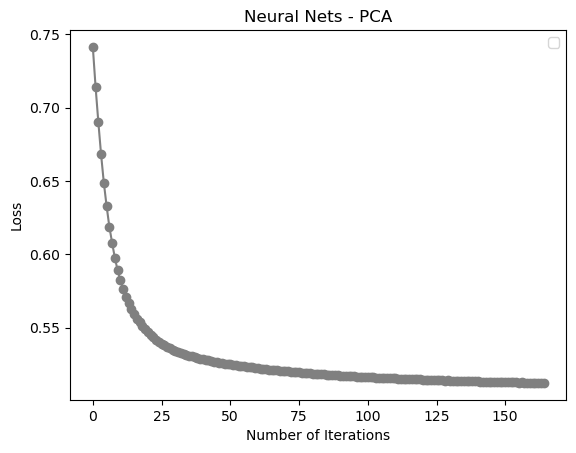

In [12]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - PCA')


In [ ]:
ICA

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Load the wine dataset
X, y = get_data()

# Create a FastICA object with the best n_components value
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)


In [14]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[71 41]
 [12 96]]
Class Report
              precision    recall  f1-score   support

         0.0       0.86      0.63      0.73       112
         1.0       0.70      0.89      0.78       108

    accuracy                           0.76       220
   macro avg       0.78      0.76      0.76       220
weighted avg       0.78      0.76      0.76       220

F1 Score:
0.7554350411493269


No handles with labels found to put in legend.


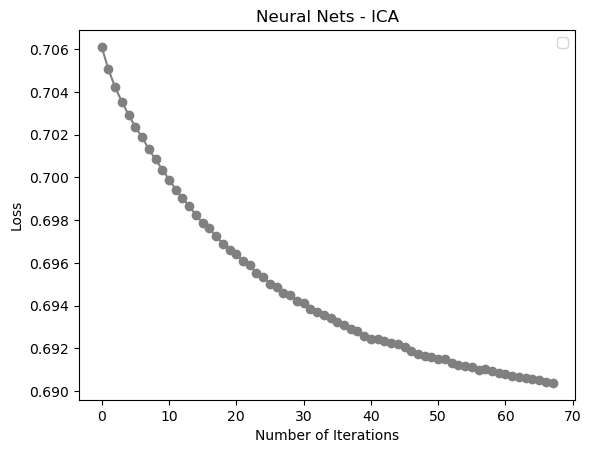

In [15]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - ICA')


Randomized Projections - 

In [16]:
from sklearn.random_projection import GaussianRandomProjection

n_components = 2
grp = GaussianRandomProjection(n_components=n_components, random_state=42)
X,y = get_data()
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_transformed = grp.fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [17]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[86 26]
 [31 77]]
Class Report
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       112
         1.0       0.75      0.71      0.73       108

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220

F1 Score:
0.7406677967823686


No handles with labels found to put in legend.


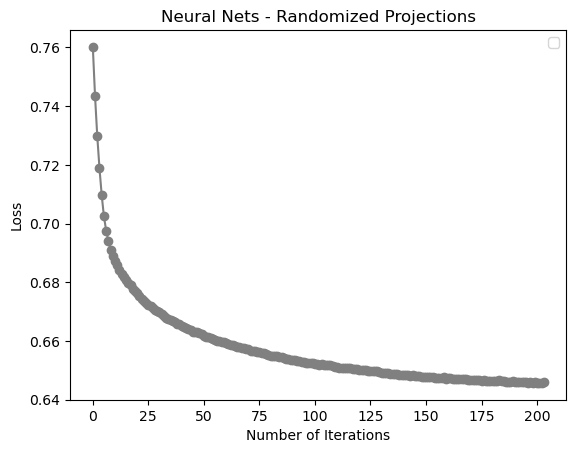

In [18]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - Randomized Projections')

RFECV

In [19]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

X,y = get_data()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create an RFECV object
rfecv = RFECV(estimator=clf, step=1, cv=5)

# Fit the RFECV object to the dataset
rfecv.fit(X, y)

# Select the optimal number of features
X_reduced = X[:, rfecv.support_]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [20]:
run_neural_network(X_train, y_train, X_test, y_test)


Confusion matrix

 [[94 18]
 [24 84]]
Class Report
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       112
         1.0       0.82      0.78      0.80       108

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

F1 Score:
0.8088537549407114


No handles with labels found to put in legend.


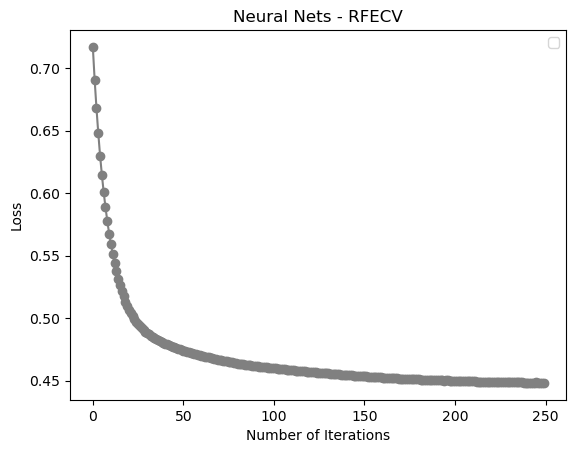

In [49]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - RFECV')

Rerun your neural network on the clustered data

Kmeans - PCA

In [22]:
kmeans = KMeans(n_clusters=2, random_state=1714)
labels = kmeans.fit_predict(X_pca)

X_new = np.hstack([X_pca, labels.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [23]:
run_neural_network(X_train, y_train, X_test, y_test)


Confusion matrix

 [[97 15]
 [25 83]]
Class Report
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       112
         1.0       0.85      0.77      0.81       108

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

F1 Score:
0.8176537594013322


No handles with labels found to put in legend.


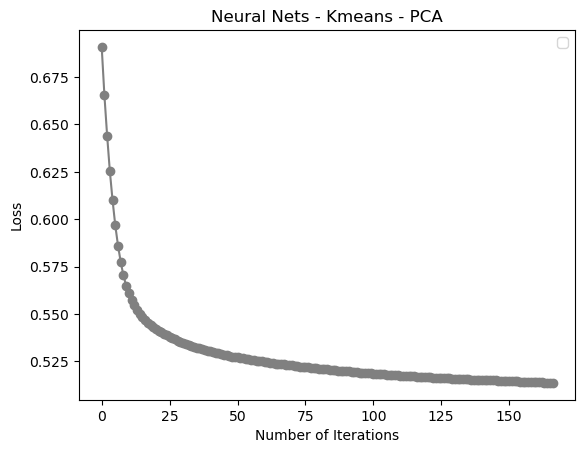

In [24]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - Kmeans - PCA')

EM - PCA

In [36]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=7, random_state=2742)
gmm.fit(X_pca)

clusters_gmm = gmm.predict(X_pca)

X_new = np.hstack([X_pca, clusters_gmm.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [37]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[97 15]
 [25 83]]
Class Report
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       112
         1.0       0.85      0.77      0.81       108

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

F1 Score:
0.8176537594013322


No handles with labels found to put in legend.


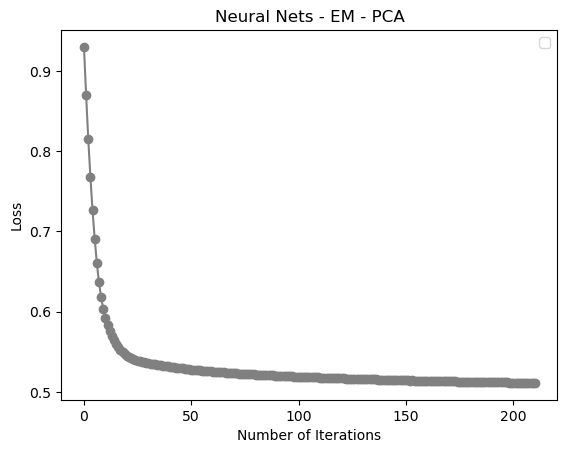

In [39]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - EM - PCA')


Kmeans - ICA

In [25]:
kmeans = KMeans(n_clusters=2, random_state=1714)
labels = kmeans.fit_predict(X_ica)

X_new = np.hstack([X_ica, labels.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [26]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[93 19]
 [30 78]]
Class Report
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       112
         1.0       0.80      0.72      0.76       108

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220

F1 Score:
0.7765098834740767


No handles with labels found to put in legend.


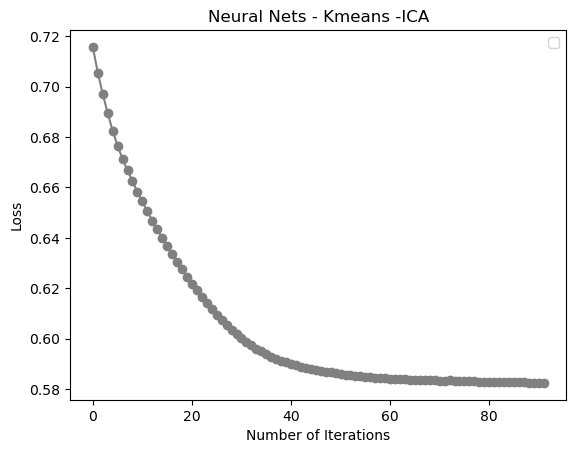

In [27]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - Kmeans -ICA')

EM - ICA

In [44]:
gmm = GaussianMixture(n_components=7, random_state=2742)
gmm.fit(X_ica)

clusters_gmm = gmm.predict(X_ica)

X_new = np.hstack([X_ica, clusters_gmm.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [45]:
run_neural_network(X_train, y_train, X_test, y_test)


Confusion matrix

 [[61 51]
 [30 78]]
Class Report
              precision    recall  f1-score   support

         0.0       0.67      0.54      0.60       112
         1.0       0.60      0.72      0.66       108

    accuracy                           0.63       220
   macro avg       0.64      0.63      0.63       220
weighted avg       0.64      0.63      0.63       220

F1 Score:
0.6290861473751042


No handles with labels found to put in legend.


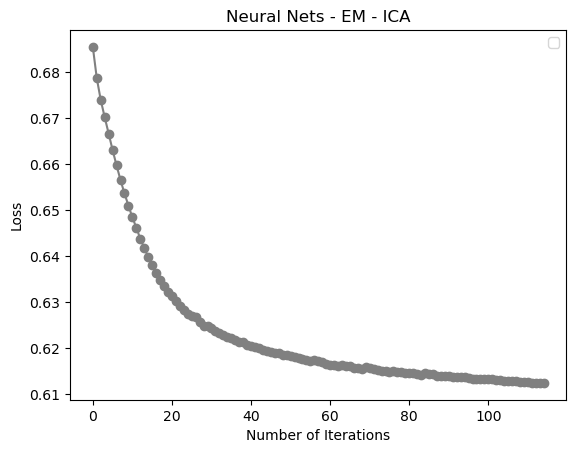

In [46]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - EM - ICA')

Kmeans -RP

In [28]:
kmeans = KMeans(n_clusters=2, random_state=1714)
labels = kmeans.fit_predict(X_std)

X_new = np.hstack([X_std, labels.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [29]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[95 17]
 [24 84]]
Class Report
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       112
         1.0       0.83      0.78      0.80       108

    accuracy                           0.81       220
   macro avg       0.82      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

F1 Score:
0.8133391329563578


No handles with labels found to put in legend.


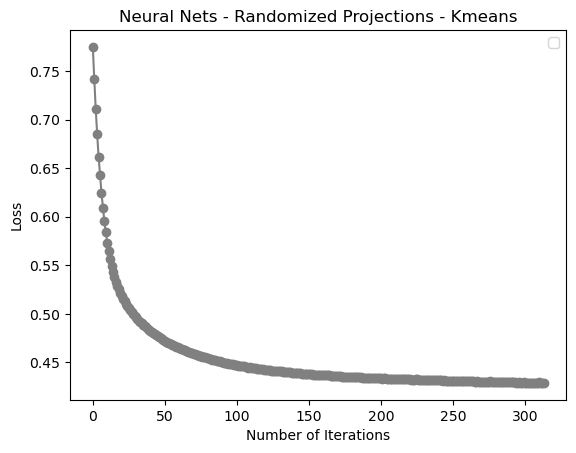

In [30]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - Randomized Projections - Kmeans')

EM -RP

In [47]:
gmm = GaussianMixture(n_components=7, random_state=2742)
gmm.fit(X_std)

clusters_gmm = gmm.predict(X_std)

X_new = np.hstack([X_std, clusters_gmm.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [48]:
run_neural_network(X_train, y_train, X_test, y_test)


Confusion matrix

 [[96 16]
 [23 85]]
Class Report
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       112
         1.0       0.84      0.79      0.81       108

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

F1 Score:
0.822444541104828


No handles with labels found to put in legend.


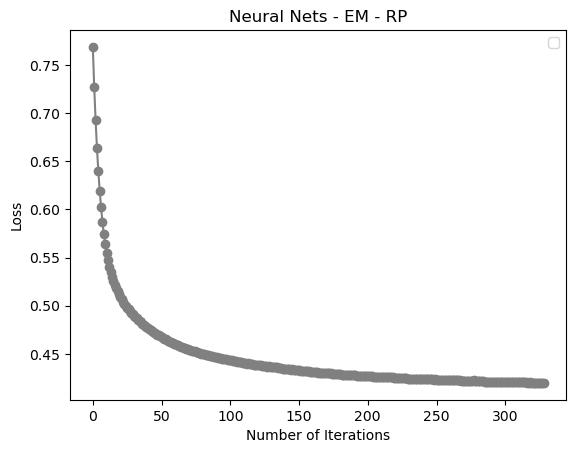

In [49]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - EM - RP')


Kmeans -RFECV

In [31]:
kmeans = KMeans(n_clusters=2, random_state=1714)
labels = kmeans.fit_predict(X_reduced)

X_new = np.hstack([X_reduced, labels.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [32]:
run_neural_network(X_train, y_train, X_test, y_test)

Confusion matrix

 [[93 19]
 [22 86]]
Class Report
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       112
         1.0       0.82      0.80      0.81       108

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

F1 Score:
0.8135554214352998


No handles with labels found to put in legend.


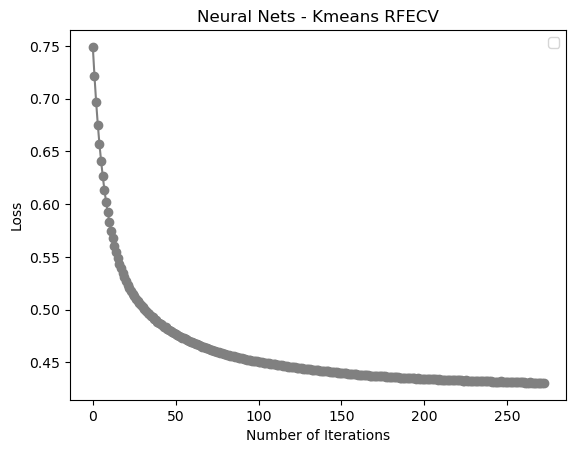

In [33]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - Kmeans RFECV')


EM -RFECV

In [50]:
gmm = GaussianMixture(n_components=7, random_state=2742)
gmm.fit(X_reduced)

clusters_gmm = gmm.predict(X_reduced)

X_new = np.hstack([X_reduced, clusters_gmm.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X_new, y.values, test_size=0.20, random_state=0)

final_tuned_params = {'alpha': 1, 'hidden_layer_sizes': (60,)}
# Best accuracy: 0.8018701298701298
nn_titanic_classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(60,), alpha=1)

In [51]:
run_neural_network(X_train, y_train, X_test, y_test)


Confusion matrix

 [[95 17]
 [25 83]]
Class Report
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       112
         1.0       0.83      0.77      0.80       108

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

F1 Score:
0.808711116469737


No handles with labels found to put in legend.


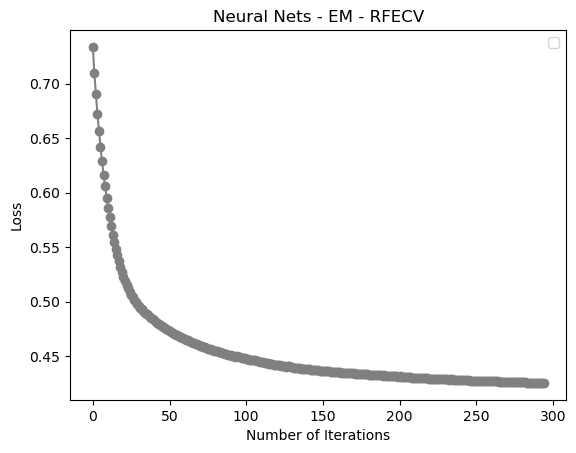

In [53]:
plot_loss_curve(nn_titanic_classifier, X_train, y_train, 'Neural Nets - EM - RFECV')